In [1]:
from __future__ import print_function,division
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn import datasets,svm
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y=iris.target

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [9]:
def evaluate_on_test_data(model=None):
    correct_classifications = 0
    predictions = model.predict(X_test)
    for i in range(len(y_test)):
        if(predictions[i]==y_test[i]):
            correct_classifications +=1
    accuracy = 100*correct_classifications/len(y_test)
    return accuracy

kernels = ('linear','poly','rbf')
accuracies = []
for index,kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    model.fit(X_train,y_train)
    acc = evaluate_on_test_data(model)
    accuracies.append(acc)
    print("{} % Accuracy is obtained with Kernel = {} ".format(acc,kernel))

84.21052631578948 % Accuracy is obtained with Kernel = linear 
81.57894736842105 % Accuracy is obtained with Kernel = poly 
84.21052631578948 % Accuracy is obtained with Kernel = rbf 


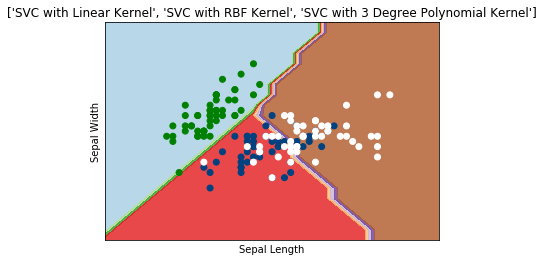

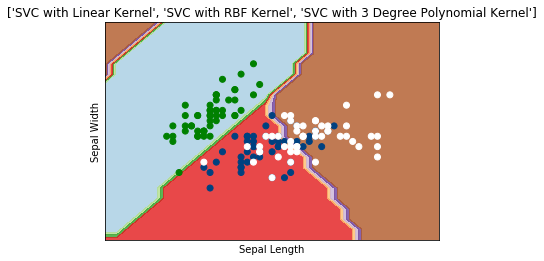

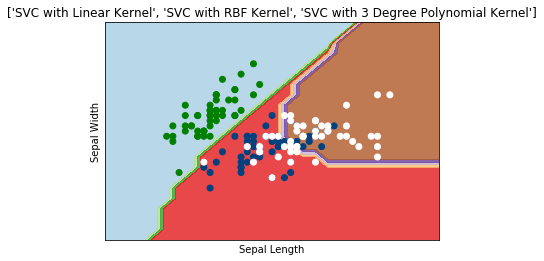

In [17]:
#Train SVM's with different kernels
svc = svm.SVC(kernel = 'linear').fit(X_train,y_train)
rbf_svc = svm.SVC(kernel = 'rbf',gamma = 0.7).fit(X_train,y_train)
poly_svc = svm.SVC(kernel = 'poly' , degree = 3).fit(X_train,y_train)

#Create a Mesh Plot
h=0.2
X_min,X_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(X_min,X_max,h), np.arange(y_min,y_max,h))

#Defining title for plots
titles = ['SVC with Linear Kernel','SVC with RBF Kernel','SVC with 3 Degree Polynomial Kernel']

for i,clf in enumerate((svc,rbf_svc,poly_svc)):
    plt.figure(i)
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap = plt.cm.Paired,alpha=0.8)
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.ocean)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[:])
    
plt.show()

In [18]:
#Checking Support Vectore..!!
print("The Support Vectores are: \n " , poly_svc.support_vectors_)

The Support Vectores are: 
  [[4.5 2.3]
 [5.4 3.4]
 [6.  3.4]
 [6.7 3.1]
 [6.6 3. ]
 [5.7 2.9]
 [5.6 3. ]
 [5.8 2.7]
 [5.7 3. ]
 [6.2 2.9]
 [6.7 3. ]
 [5.9 3.2]
 [6.  2.7]
 [6.3 2.5]
 [6.1 2.9]
 [6.5 2.8]
 [7.  3.2]
 [5.9 3. ]
 [5.7 2.6]
 [6.1 3. ]
 [6.6 2.9]
 [5.6 3. ]
 [4.9 2.4]
 [6.9 3.1]
 [5.7 2.8]
 [6.3 2.3]
 [6.4 2.9]
 [6.1 2.8]
 [5.8 2.6]
 [5.8 2.7]
 [6.3 2.8]
 [6.4 3.1]
 [6.3 2.7]
 [5.7 2.5]
 [6.  3. ]
 [5.8 2.7]
 [6.2 3.4]
 [6.4 2.7]
 [5.8 2.8]
 [6.1 2.6]
 [6.  2.2]
 [6.3 3.4]
 [6.8 3. ]
 [6.3 3.3]
 [6.2 2.8]
 [6.4 3.2]
 [6.5 3. ]
 [6.7 3.3]
 [6.7 3.3]
 [6.7 3.1]
 [6.3 2.9]
 [6.5 3. ]
 [5.6 2.8]
 [5.9 3. ]
 [4.9 2.5]]


In [19]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

def evaluate_on_test_data(model=None):
    predictions = model.predict(X_test)
    sum_of_squared_error = 0
    for i in range(len(y_test)):
        err = (predictions[i]-y_test[i]) **2
        sum_of_squared_error += err
    mean_squared_error = sum_of_squared_error/len(y_test)
    RMSE = np.sqrt(mean_squared_error) 
    return RMSE

kernels = ('linear','rbf')
RMSE_vec = []
for index, kernel in enumerate(kernels):
    model = svm.SVR(kernel=kernel)
    model.fit(X_train, y_train)
    RMSE = evaluate_on_test_data(model)
    RMSE_vec.append(RMSE)
    print("RMSE={} obtained with kernel = {}".format(RMSE, kernel))

RMSE=5.305100811348274 obtained with kernel = linear
RMSE=8.280264820347222 obtained with kernel = rbf
